In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
weather = pd.read_csv("austin_weather.csv")
weather.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [4]:
weather = weather.drop(["Date", "TempHighF", "TempLowF", "DewPointHighF", "DewPointLowF", "HumidityHighPercent", "HumidityLowPercent", "SeaLevelPressureHighInches", "SeaLevelPressureLowInches", "VisibilityHighMiles", "VisibilityLowMiles", "WindHighMPH", "WindGustMPH"], axis=1)
weather.head()

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH,PrecipitationSumInches,Events
0,60,49,75,29.68,7,4,0.46,"Rain , Thunderstorm"
1,48,36,68,30.13,10,6,0,
2,45,27,52,30.49,10,3,0,
3,46,28,56,30.45,10,4,0,
4,50,40,71,30.33,10,2,T,


In [5]:
weather = weather.replace('T', 0.0)

In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   TempAvgF                   1319 non-null   int64 
 1   DewPointAvgF               1319 non-null   object
 2   HumidityAvgPercent         1319 non-null   object
 3   SeaLevelPressureAvgInches  1319 non-null   object
 4   VisibilityAvgMiles         1319 non-null   object
 5   WindAvgMPH                 1319 non-null   object
 6   PrecipitationSumInches     1319 non-null   object
 7   Events                     1319 non-null   object
dtypes: int64(1), object(7)
memory usage: 82.6+ KB


In [7]:
weather = weather.replace('-', np.NaN)
weather = weather.dropna()
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1318
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   TempAvgF                   1307 non-null   int64 
 1   DewPointAvgF               1307 non-null   object
 2   HumidityAvgPercent         1307 non-null   object
 3   SeaLevelPressureAvgInches  1307 non-null   object
 4   VisibilityAvgMiles         1307 non-null   object
 5   WindAvgMPH                 1307 non-null   object
 6   PrecipitationSumInches     1307 non-null   object
 7   Events                     1307 non-null   object
dtypes: int64(1), object(7)
memory usage: 91.9+ KB


In [8]:
weather["DewPointAvgF"] = weather["DewPointAvgF"].astype(float)
weather["HumidityAvgPercent"] = weather["HumidityAvgPercent"].astype(float)
weather["SeaLevelPressureAvgInches"] = weather["SeaLevelPressureAvgInches"].astype(float)
weather["VisibilityAvgMiles"] = weather["VisibilityAvgMiles"].astype(float)
weather["WindAvgMPH"] = weather["WindAvgMPH"].astype(float)
weather["PrecipitationSumInches"] = weather["PrecipitationSumInches"].astype(float)
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1318
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TempAvgF                   1307 non-null   int64  
 1   DewPointAvgF               1307 non-null   float64
 2   HumidityAvgPercent         1307 non-null   float64
 3   SeaLevelPressureAvgInches  1307 non-null   float64
 4   VisibilityAvgMiles         1307 non-null   float64
 5   WindAvgMPH                 1307 non-null   float64
 6   PrecipitationSumInches     1307 non-null   float64
 7   Events                     1307 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 91.9+ KB


In [9]:
def norm_rain(string : str) -> int:
    if string.find("Rain") != -1:
        return 1
    else:
        return 0

In [10]:
weather["Events"] = weather["Events"].apply(norm_rain)
weather

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH,PrecipitationSumInches,Events
0,60,49.0,75.0,29.68,7.0,4.0,0.46,1
1,48,36.0,68.0,30.13,10.0,6.0,0.00,0
2,45,27.0,52.0,30.49,10.0,3.0,0.00,0
3,46,28.0,56.0,30.45,10.0,4.0,0.00,0
4,50,40.0,71.0,30.33,10.0,2.0,0.00,0
...,...,...,...,...,...,...,...,...
1314,89,67.0,54.0,29.97,10.0,5.0,0.00,0
1315,91,64.0,54.0,29.90,10.0,5.0,0.00,0
1316,92,64.0,51.0,29.86,10.0,4.0,0.00,0
1317,93,68.0,48.0,29.91,10.0,4.0,0.00,0


In [11]:
print("Rainy days: ")
print(weather["Events"][weather.Events == 1].count())
print("Days without rain:")
print(weather["Events"][weather.Events == 0].count())

Rainy days: 
375
Days without rain:
932


In [12]:
weather["Events"] = weather["Events"].astype(int)

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [61]:
X_train, X_test_b, y_train, y_test_b = train_test_split(weather.to_numpy()[:,1:-1], weather.Events.to_numpy(), train_size = 0.8)

In [62]:
clf_b = MultinomialNB()
clf_b.fit(X_train, y_train)

MultinomialNB()

In [63]:
pred = clf_b.predict(X_test_b)
print(classification_report(y_test_b, pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       190
           1       0.88      0.58      0.70        72

    accuracy                           0.86       262
   macro avg       0.87      0.78      0.81       262
weighted avg       0.86      0.86      0.85       262



In [64]:
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

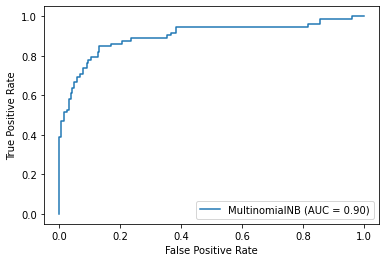

In [65]:
plot_roc_curve(clf_b, X_test_b, y_test_b)  
plt.show()

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import * 
from sklearn.metrics import plot_confusion_matrix

In [49]:
X_train, X_test, y_train, y_test = train_test_split(weather.to_numpy()[:,1:-1], weather.Events.to_numpy(), train_size = 0.8)

In [50]:
kNN_1 = KNeighborsClassifier(n_neighbors=1)
kNN_2 = KNeighborsClassifier(n_neighbors=2)
kNN_3 = KNeighborsClassifier(n_neighbors=3)
kNN_4 = KNeighborsClassifier(n_neighbors=4)

In [51]:
kNN_1.fit(X_train, y_train)
print(classification_report(y_test, kNN_1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       193
           1       0.68      0.59      0.64        69

    accuracy                           0.82       262
   macro avg       0.77      0.75      0.76       262
weighted avg       0.81      0.82      0.82       262



In [52]:
kNN_2.fit(X_train, y_train)
print(classification_report(y_test, kNN_2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       193
           1       0.84      0.46      0.60        69

    accuracy                           0.84       262
   macro avg       0.84      0.72      0.75       262
weighted avg       0.84      0.84      0.82       262



In [53]:
kNN_3.fit(X_train, y_train)
print(classification_report(y_test, kNN_3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       193
           1       0.70      0.55      0.62        69

    accuracy                           0.82       262
   macro avg       0.78      0.73      0.75       262
weighted avg       0.81      0.82      0.81       262



In [54]:
kNN_4.fit(X_train, y_train)
print(classification_report(y_test, kNN_4.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       193
           1       0.82      0.48      0.61        69

    accuracy                           0.84       262
   macro avg       0.83      0.72      0.75       262
weighted avg       0.83      0.84      0.82       262



In [55]:
kNN_10 = KNeighborsClassifier(n_neighbors=10)

In [56]:
kNN_10.fit(X_train, y_train)
print(classification_report(y_test, kNN_10.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       193
           1       0.75      0.52      0.62        69

    accuracy                           0.83       262
   macro avg       0.80      0.73      0.75       262
weighted avg       0.82      0.83      0.82       262



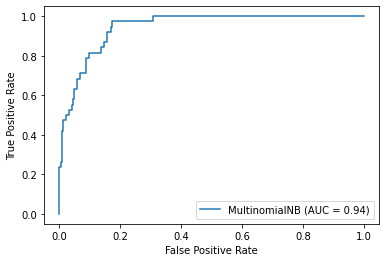

In [57]:
plot_roc_curve(clf, X_test, kNN_2.predict(X_test))  
plt.show()

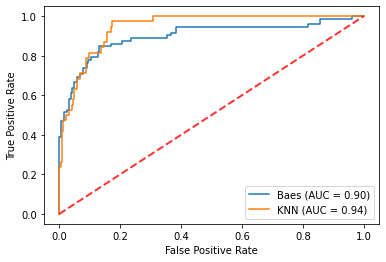

In [68]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

viz = plot_roc_curve(clf_b, X_test_b, y_test_b, name="Baes", ax=ax) 
interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
interp_tpr[0] = 0.0
tprs.append(interp_tpr)
aucs.append(viz.roc_auc)

viz = plot_roc_curve(clf, X_test, kNN_2.predict(X_test), name="KNN", ax=ax)
interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
interp_tpr[0] = 0.0
tprs.append(interp_tpr)
aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

std_auc = np.std(aucs)
plt.show()